In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\aks13\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['PG','MSFT','F','GE']
data  = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.313478,2.413537,4.186858,2.729230
1995-01-04,8.246841,2.431082,4.299507,2.729230
1995-01-05,8.130219,2.390982,4.261956,2.735919
1995-01-06,8.146880,2.431082,4.261956,2.722540
1995-01-09,8.113561,2.416045,4.337057,2.695783


In [4]:
data.tail()

,PG,MSFT,F,GE
Date,,,,
2020-05-05,116.010002,180.759995,4.97,6.20
2020-05-06,113.099998,182.539993,4.87,5.98
2020-05-07,112.169998,183.600006,4.87,6.11
2020-05-08,115.949997,184.679993,5.24,6.29
2020-05-11,115.309998,186.740005,5.12,6.19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6384 entries, 1995-01-03 to 2020-05-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6384 non-null   float64
 1   MSFT    6384 non-null   float64
 2   F       6384 non-null   float64
 3   GE      6384 non-null   float64
dtypes: float64(4)
memory usage: 249.4 KB


In [8]:
data.iloc[0]

PG      8.313478
MSFT    2.413537
F       4.186858
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

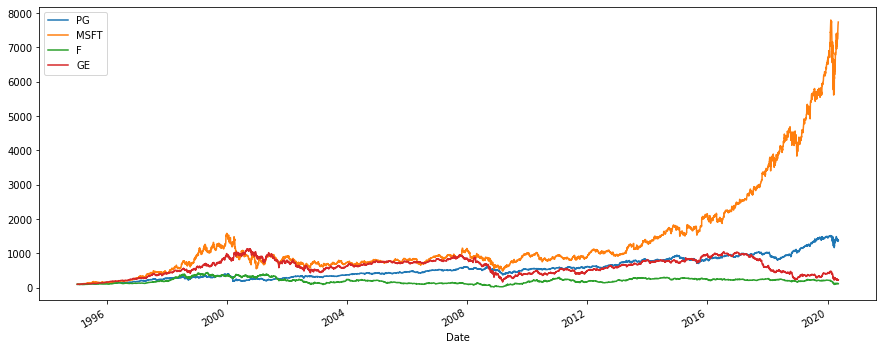

In [9]:
(data / data.iloc[0] * 100).plot(figsize =(15,6))

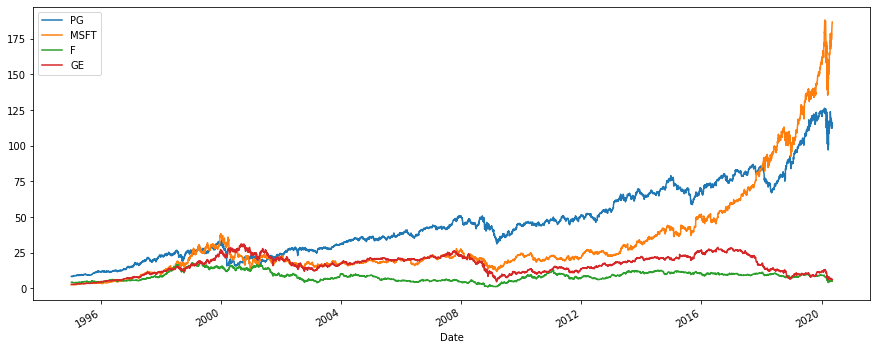

In [10]:
data.plot(figsize=(15,6))

In [13]:
returns = (data/data.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [14]:
weights = np.array([0.25,0.25,0.25,0.25])

In [19]:
annual_returns = returns.mean()*250
print(annual_returns)

PG      0.128949
MSFT    0.220486
F       0.087049
GE      0.081524
dtype: float64


In [21]:
np.dot(annual_returns, weights)

0.12950191248068355

In [23]:
portfolio_return = round(np.dot(annual_returns, weights)*100,2)
portfolio_return

12.95

In [24]:
weights2 = [0.4,0.4,0.15,0.05]

In [27]:
portfolio_return2 = round(np.dot(annaul_returns, weights2)*100, 2)
portfolio_return2

15.69

In [30]:
print(portfolio_return,'%') 
print(portfolio_return2,'%')

12.95 %
15.69 %
